In [1]:
import torch
import torch.nn as nn  # neural network modules 
import torch.nn.functional as F  # activation functions
import torch.optim as optim  # optimizer
from torch.autograd import Variable # add gradients to tensors
from torch.nn import Parameter # model parameter functionality
import torchvision.datasets as datasets

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from prob5_fcnn import train, plot_accuracies_v_epoch

train data shape: torch.Size([1000, 784])
train label shape: torch.Size([1000])
test data shape: torch.Size([2000, 784])
test label shape: torch.Size([2000])


In [3]:

# parameters
learning_rate = 0.01 # Ha ha! This means it will learn really quickly, right?
#TODO Daniel increase epochs
num_epochs = 150 # Training for a long time to see overfitting
batch_size = 128
n_hidden_1 = 500

# TODO 5.2: Defining loss functions
loss_functions = {
    "CE": torch.nn.CrossEntropyLoss(),
    "MSE": torch.nn.MSELoss(),
    "L1": torch.nn.L1Loss()
}
loss_functions_label = "CE"

#regularization
p = 0.05
exp_reg = 2
lambda_reg = 0#.01 #0.001

activation_functions = {
    "sigmoid": nn.Sigmoid(),
    "relu": nn.ReLU(),
    "tanh": nn.Tanh()
}
activation_functions_label = "sigmoid"

# network parameters
num_input = 784  # MNIST data input (img shape: 28*28)
num_classes = 10  # MNIST total classes (0-9 digits)


Problem 5.1 best run

Print hyper parameters and accuracy generated with tensor board

In [4]:
#load hparams_table.csv with first line as header
hparams_table = np.genfromtxt('result_files/hparams_table.csv', delimiter=',', dtype=None, encoding=None, names=True)
pd.DataFrame(hparams_table)

,learning_rate,num_epochs,n_hidden_1,loss_functions_label,activation_functions_label,train_accuracy,test_accuracy
0,0.100,1000.0,64.0,CE,sigmoid,99.699997,81.449997
1,0.100,100.0,64.0,CE,sigmoid,96.300003,80.550003
2,0.010,100.0,64.0,CE,sigmoid,95.599998,75.250000
3,0.010,100.0,1000.0,CE,sigmoid,99.699997,81.199997
4,0.001,100.0,64.0,CE,sigmoid,77.599998,53.849998
5,0.100,100.0,64.0,CE,sigmoid,96.300003,80.550003
6,0.100,100.0,64.0,MSE,sigmoid,96.900002,75.050003
7,0.200,100.0,64.0,MSE,sigmoid,96.800003,77.750000
8,0.200,100.0,64.0,CE,sigmoid,86.000000,68.949997
9,0.100,100.0,64.0,CE,sigmoid,96.300003,80.550003


In [5]:
metric_array, model_mse = train(loss_functions_label= "CE")

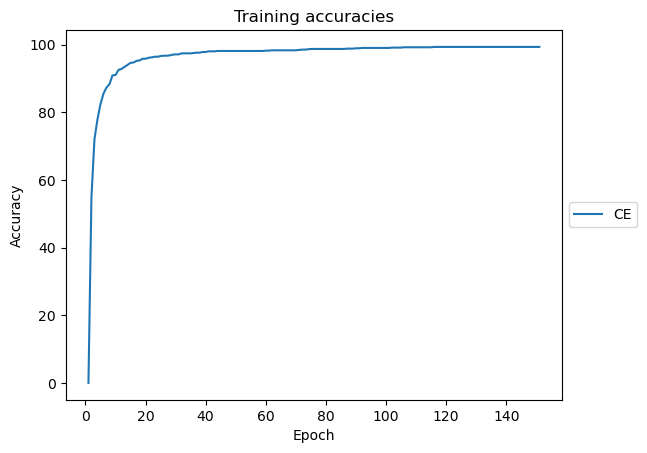

In [6]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array, "CE", ax=ax)
plt.show()

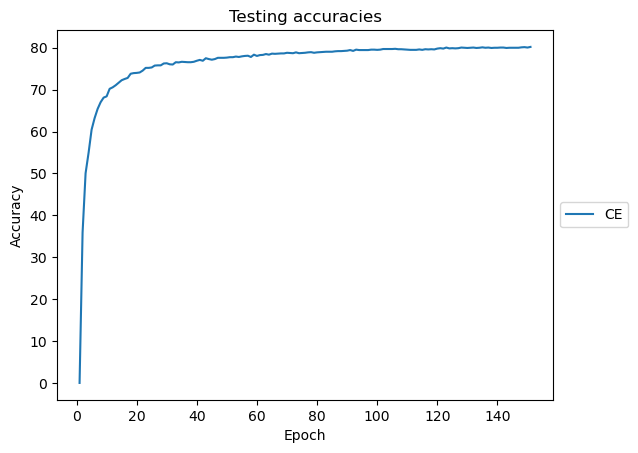

In [7]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array, "CE", ax=ax, plot_training = False)
plt.show()

Problem 5.2

In [8]:
metric_array_mse, model_mse = train(loss_functions_label= "MSE")
metric_array_ce, model_ce = train(loss_functions_label= "CE")

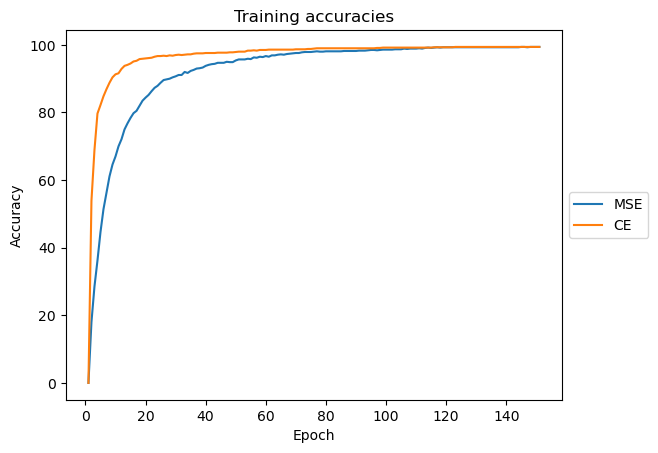

In [9]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array_mse, "MSE", ax=ax)
plot_accuracies_v_epoch(metric_array_ce, "CE", ax=ax)
plt.show()

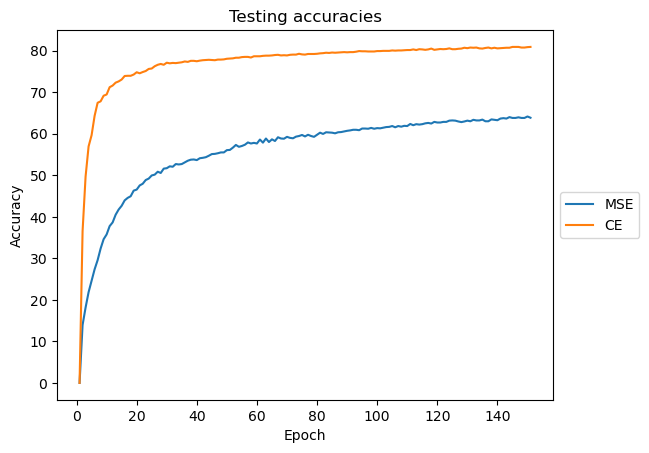

In [10]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array_mse, "MSE", plot_training=False, ax=ax)
plot_accuracies_v_epoch(metric_array_ce, "CE", plot_training=False, ax=ax)
plt.show()

CE converges faster and has the highest test accuracy. When the CE cost function and the sigmoid activation are combined, the learning rate depends on the input error rate. Learning happens quickly. For MSE on the other hand, the learning is slow and it plateaus in the beginning.

L1 regularisation

In [11]:
metric_array1, model1 = train(exp_reg = 1, lambda_reg= 0.001)
metric_array2, model2 = train(exp_reg = 1, lambda_reg= 0.005)

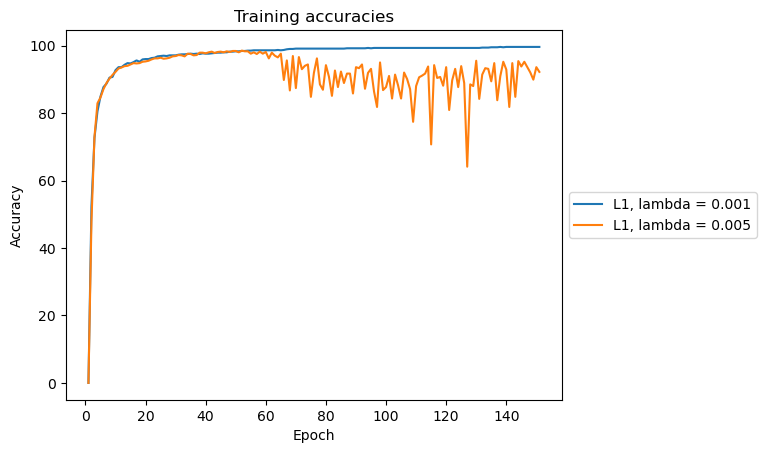

In [12]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array1, "L1, lambda = 0.001", ax=ax)
plot_accuracies_v_epoch(metric_array2, "L1, lambda = 0.005", ax=ax)
plt.show()

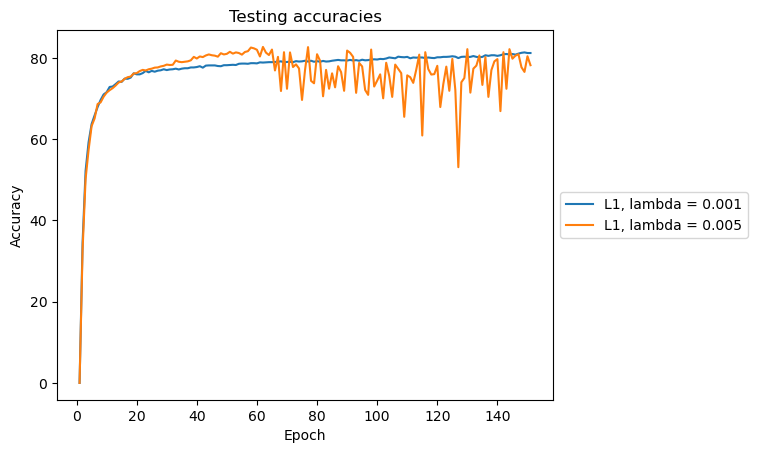

In [13]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array1, "L1, lambda = 0.001", plot_training=False, ax=ax)
plot_accuracies_v_epoch(metric_array2, "L1, lambda = 0.005", plot_training=False, ax=ax)
plt.show()

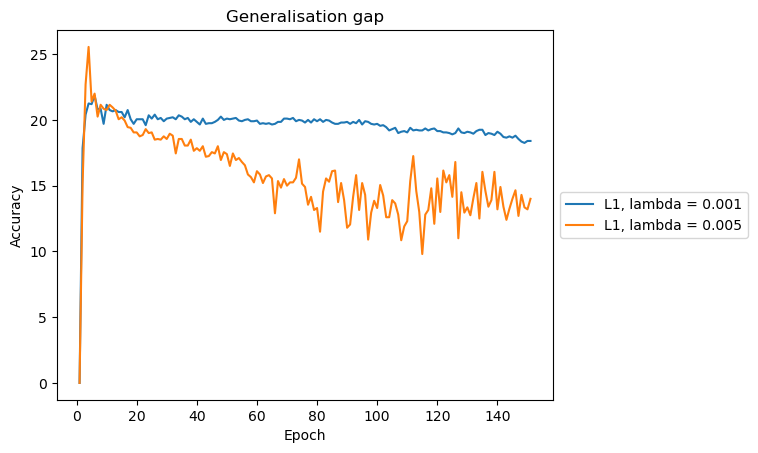

In [14]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array1, "L1, lambda = 0.001", generalisation_gap=True, ax=ax)
plot_accuracies_v_epoch(metric_array2, "L1, lambda = 0.005", generalisation_gap=True, ax=ax)
plt.show()

L2 regularisation

In [15]:
metric_array4, model1 = train(exp_reg = 2, lambda_reg= 0.001)
metric_array5, model2 = train(exp_reg = 2, lambda_reg= 0.01)
metric_array6, model3 = train(exp_reg = 2, lambda_reg= 0.1)

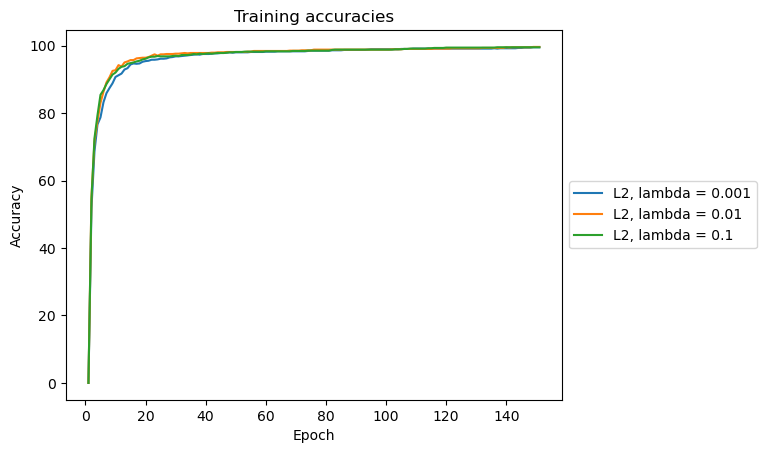

In [16]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array4, "L2, lambda = 0.001", ax=ax)
plot_accuracies_v_epoch(metric_array5, "L2, lambda = 0.01", ax=ax)
plot_accuracies_v_epoch(metric_array6, "L2, lambda = 0.1", ax=ax)
plt.show()

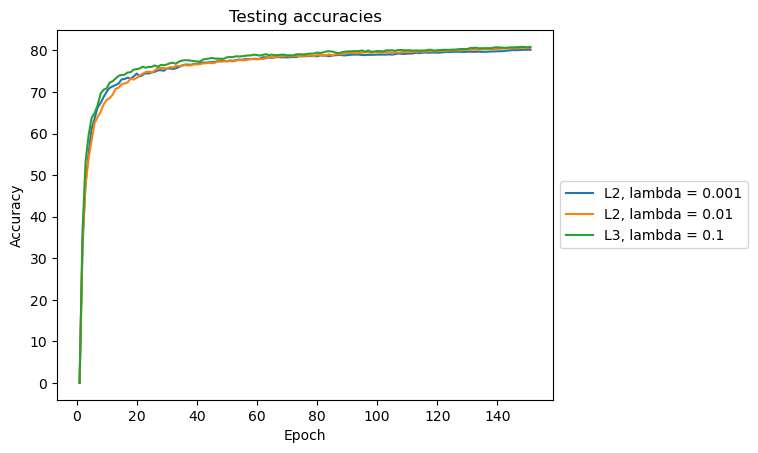

In [17]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array4, "L2, lambda = 0.001", ax=ax, plot_training=False)
plot_accuracies_v_epoch(metric_array5, "L2, lambda = 0.01", ax=ax, plot_training=False)
plot_accuracies_v_epoch(metric_array6, "L3, lambda = 0.1", ax=ax, plot_training=False)
plt.show()

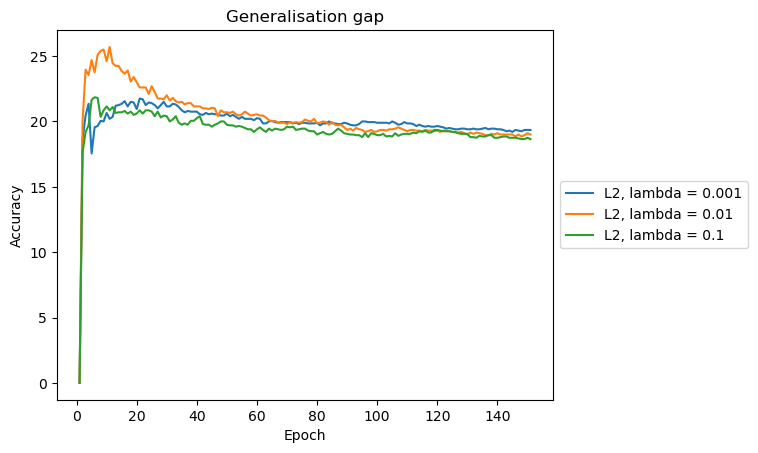

In [18]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array4, "L2, lambda = 0.001", ax=ax, generalisation_gap=True)
plot_accuracies_v_epoch(metric_array5, "L2, lambda = 0.01", ax=ax, generalisation_gap=True)
plot_accuracies_v_epoch(metric_array6, "L2, lambda = 0.1", ax=ax, generalisation_gap=True)
plt.show()

dropout

In [19]:
metric_array7, model1 = train(p = 0.05)
metric_array8, model2 = train(p = 0.1)
metric_array9, model3 = train(p = 0.5)

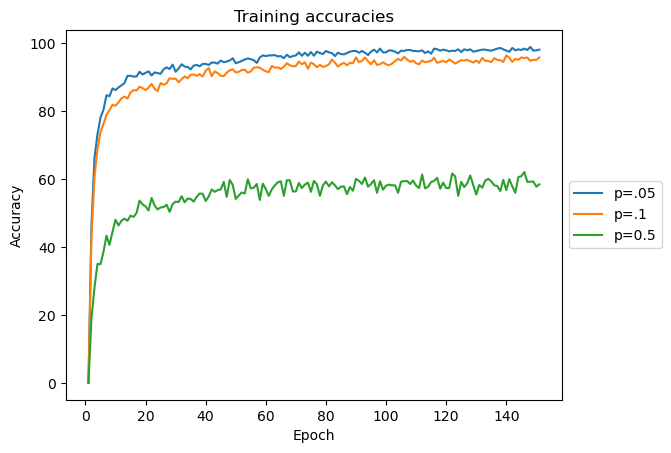

In [20]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array7, "p=.05", ax=ax)
plot_accuracies_v_epoch(metric_array8, "p=.1", ax=ax)
plot_accuracies_v_epoch(metric_array9, "p=0.5", ax=ax)
plt.show()

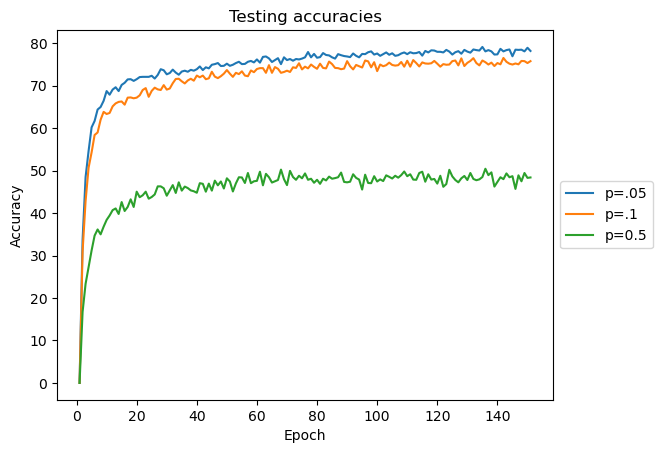

In [21]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array7, "p=.05", ax=ax, plot_training=False)
plot_accuracies_v_epoch(metric_array8, "p=.1", ax=ax, plot_training=False)
plot_accuracies_v_epoch(metric_array9, "p=0.5", ax=ax, plot_training=False)
plt.show()

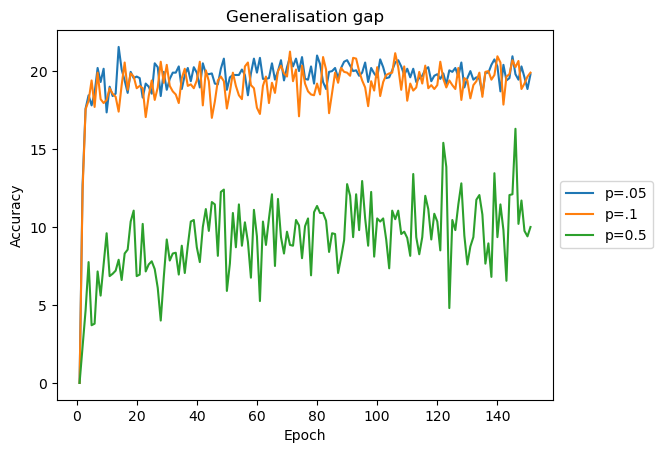

In [22]:
fig, ax = plt.subplots()
plot_accuracies_v_epoch(metric_array7, "p=.05", ax=ax, generalisation_gap=True)
plot_accuracies_v_epoch(metric_array8, "p=.1", ax=ax, generalisation_gap=True)
plot_accuracies_v_epoch(metric_array9, "p=0.5", ax=ax, generalisation_gap=True)
plt.show()

collected figure

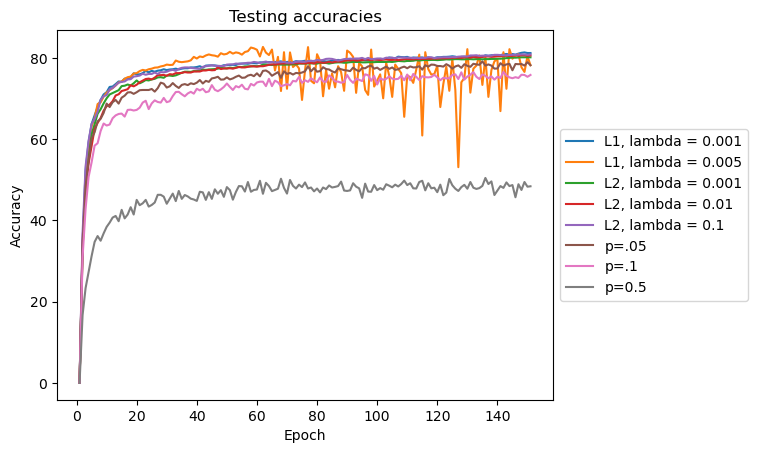

In [23]:
fig, ax = plt.subplots()
#L1
plot_accuracies_v_epoch(metric_array1, "L1, lambda = 0.001", ax=ax, plot_training=False)
plot_accuracies_v_epoch(metric_array2, "L1, lambda = 0.005", ax=ax, plot_training=False)
#L2
plot_accuracies_v_epoch(metric_array4, "L2, lambda = 0.001", ax=ax, plot_training=False)
plot_accuracies_v_epoch(metric_array5, "L2, lambda = 0.01", ax=ax, plot_training=False)
plot_accuracies_v_epoch(metric_array6, "L2, lambda = 0.1", ax=ax, plot_training=False)
#p
plot_accuracies_v_epoch(metric_array7, "p=.05", ax=ax, plot_training=False)
plot_accuracies_v_epoch(metric_array8, "p=.1", ax=ax, plot_training=False)
plot_accuracies_v_epoch(metric_array9, "p=0.5", ax=ax, plot_training=False)
plt.show()

The results are sensitive to the parameters. The best regularisation is L1 with lambda = 0.001

Problem 5.4

confusion matrix of missclassified digits

In [24]:
# Download the MNIST dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Separate into data and labels
# Reducing training dataset to 1000 points and test dataset to 2000 points in order to create an overfitting model on 
# which to study regularization later

# training data
train_data = mnist_trainset.data.to(dtype=torch.float32)[:1000]
train_data = train_data.reshape(-1, 784)
train_labels = mnist_trainset.targets.to(dtype=torch.long)[:1000]

print(f"train data shape: {train_data.size()}")
print(f"train label shape: {train_labels.size()}")

# testing data
test_data = mnist_testset.data.to(dtype=torch.float32)[:2000]
test_data = test_data.reshape(-1, 784)
test_labels = mnist_testset.targets.to(dtype=torch.long)[:2000]

print(f"test data shape: {test_data.size()}")
print(f"test label shape: {test_labels.size()}")

# Load into torch datasets
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)

train data shape: torch.Size([1000, 784])
train label shape: torch.Size([1000])
test data shape: torch.Size([2000, 784])
test label shape: torch.Size([2000])


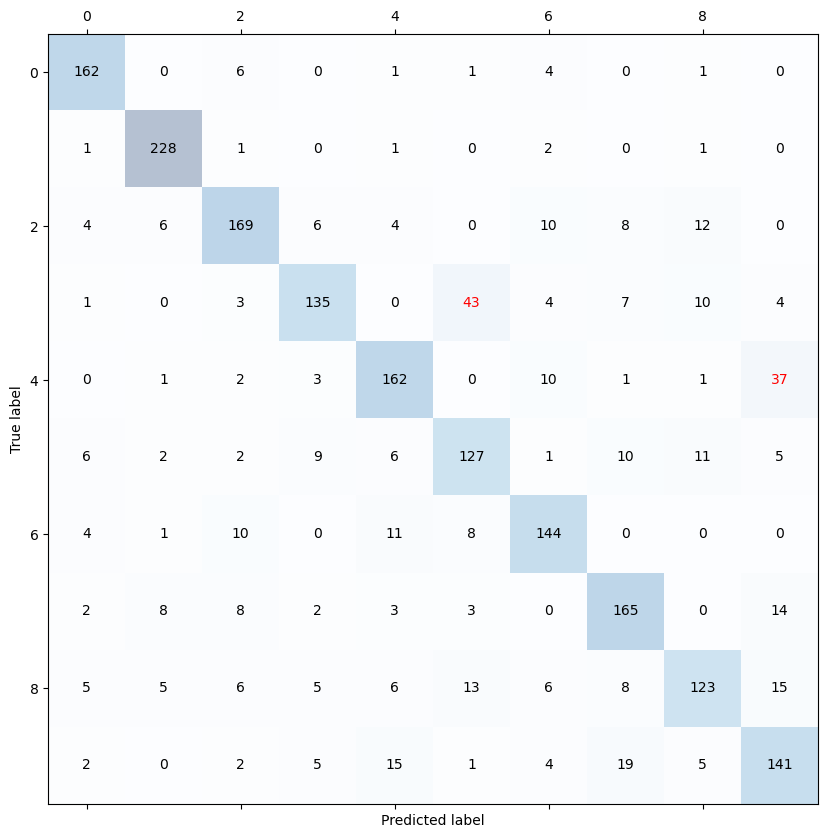

In [25]:
test_label_predicted = model1(test_data)
# get max
test_label_predicted = torch.argmax(test_label_predicted, dim=1)
confusion_matrix_output = confusion_matrix(test_labels, test_label_predicted)

#plot confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confusion_matrix_output, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix_output.shape[0]):
    for j in range(confusion_matrix_output.shape[1]):
        #if confusion_matrix_output[i, j] > 15, print in red
        if confusion_matrix_output[i, j] > 20 and i != j:
            ax.text(x=j, y=i, s=confusion_matrix_output[i, j], va='center', ha='center', color='red')
        else:
            ax.text(x=j, y=i, s=confusion_matrix_output[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

mistaken digits are colored in red. E.g. the 3 is often  mistaken for a 5.